**Objective:**

Analyze the provided ball-by-ball IPL deliveries dataset to find meaningful patterns and
strategic insights about players and teams.

**Core Requirements:**

● Clean and prepare the dataset for analysis.

● Perform analysis to identify top performers, key matchups, and performance trends (e.g.,
in powerplay(overs 1 to 6) or death overs(overs 16 to 20)).

● Present at least three actionable insights supported by visualizations.


**Brownie Points:**

● Create interactive visualizations using a library like Plotly.

● Insightful and Interactive Visualization

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
#importing the dataset
df=pd.read_excel('/content/deliveries_updated_mens_ipl_upto_2024.xlsx')

In [16]:
#basic
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   matchId           260920 non-null  int64         
 1   inning            260920 non-null  int64         
 2   over_ball         260920 non-null  float64       
 3   over              260920 non-null  int64         
 4   ball              260920 non-null  int64         
 5   batting_team      260920 non-null  object        
 6   bowling_team      260920 non-null  object        
 7   batsman           260920 non-null  object        
 8   non_striker       260920 non-null  object        
 9   bowler            260920 non-null  object        
 10  batsman_runs      260920 non-null  int64         
 11  extras            260920 non-null  int64         
 12  isWide            8381 non-null    float64       
 13  isNoBall          1093 non-null    float64       
 14  Byes

In [13]:
df.head()

,matchId,inning,over_ball,over,ball,batting_team,bowling_team,batsman,non_striker,bowler,batsman_runs,extras,isWide,isNoBall,Byes,LegByes,Penalty,dismissal_kind,player_dismissed,date
0,335982,1,0.1,0,1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2008-04-18
1,335982,1,0.2,0,2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-04-18
2,335982,1,0.3,0,3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2008-04-18
3,335982,1,0.4,0,4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-04-18
4,335982,1,0.5,0,5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-04-18


In [18]:
#drop not useful column  (axis=0->horizontal,axis=1->vertical)
df.drop(['matchId'],axis=1,inplace=True)

In [19]:
df.describe()

,inning,over_ball,over,ball,batsman_runs,extras,isWide,isNoBall,Byes,LegByes,Penalty,date
count,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,8381.000000,1093.000000,673.000000,4001.000000,2.0,260920
mean,1.483531,9.560015,9.197677,3.623452,1.265001,0.067806,1.201050,1.032022,1.866270,1.307673,5.0,2016-07-08 06:32:41.649547776
min,1.000000,0.100000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.0,2008-04-18 00:00:00
25%,1.000000,4.500000,4.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.0,2012-04-22 00:00:00
50%,1.000000,9.400000,9.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.0,2016-05-06 00:00:00
75%,2.000000,14.400000,14.000000,5.000000,1.000000,0.000000,1.000000,1.000000,4.000000,1.000000,5.0,2021-04-17 00:00:00
max,6.000000,19.900000,19.000000,11.000000,6.000000,7.000000,5.000000,5.000000,4.000000,5.000000,5.0,2024-05-26 00:00:00
std,0.502643,5.686116,5.683484,1.813850,1.639298,0.343265,0.783803,0.314310,1.312692,0.852387,0.0,NaN


In [20]:
df.isnull().sum()

,0
inning,0
over_ball,0
over,0
ball,0
batting_team,0
bowling_team,0
batsman,0
non_striker,0
bowler,0
batsman_runs,0


<Axes: >

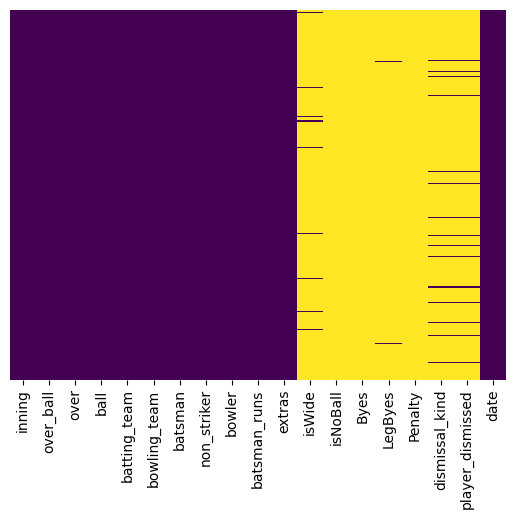

In [21]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [30]:
#filling the missing values
df['isWide'] = df['isWide'].fillna(0)  #if no entry means consider 0
df['isNoBall'] = df['isNoBall'].fillna(0)
df['Byes'] = df['Byes'].fillna(0)
df['LegByes'] = df['LegByes'].fillna(0)
df['Penalty'] = df['Penalty'].fillna(0)

In [32]:
df.isnull().sum()

,0
inning,0
over_ball,0
over,0
ball,0
batting_team,0
bowling_team,0
batsman,0
non_striker,0
bowler,0
batsman_runs,0


In [31]:
#if blank fill with not dismissed
df['dismissal_kind'] = df['dismissal_kind'].fillna('Not Dismissed')
df['player_dismissed'] = df['player_dismissed'].fillna('Not Dismissed')

In [35]:
df.duplicated().sum()
#to see if identical rows exits

np.int64(0)

In [36]:
df = df.drop_duplicates() #to remove identical rows

In [37]:
df.isnull().sum()

,0
inning,0
over_ball,0
over,0
ball,0
batting_team,0
bowling_team,0
batsman,0
non_striker,0
bowler,0
batsman_runs,0


In [40]:
top_batsman = df.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)
#df.groupby("batter") → groups the dataset by batsman name.
#["batsman_runs"] → selects only the column showing runs scored from each ball.
#.sum() -> Adds up all the runs for each batsman across all matches.
#ascending=False means highest runs will come first.
#.head(10)->Takes only the top 10 batsmen.

In [41]:
print(top_batsman)

batsman
V Kohli           8014
S Dhawan          6769
RG Sharma         6630
DA Warner         6567
SK Raina          5536
MS Dhoni          5243
AB de Villiers    5181
CH Gayle          4997
RV Uthappa        4954
KD Karthik        4843
Name: batsman_runs, dtype: int64


In [46]:
top_bowlers = (df[df["player_dismissed"] != "Not Dismissed"].groupby("bowler")["player_dismissed"].count().sort_values(ascending=False).head(10))

In [47]:
print(top_bowlers)

bowler
YS Chahal     213
DJ Bravo      207
PP Chawla     201
SP Narine     200
R Ashwin      198
B Kumar       195
SL Malinga    188
A Mishra      183
JJ Bumrah     182
RA Jadeja     169
Name: player_dismissed, dtype: int64


In [48]:
powerplay_runs=(df[df['over'].between(1,6)].groupby('batting_team')['batsman_runs'].sum().sort_values(ascending=False).head(10))

In [51]:
death_overs=(df[df['over'].between(16,20)].groupby('batting_team')['batsman_runs'].sum().sort_values(ascending=False).head(10))

In [53]:
print(powerplay_runs)


batting_team
Mumbai Indians                 11600
Kolkata Knight Riders          11223
Chennai Super Kings            10798
Royal Challengers Bangalore    10341
Rajasthan Royals                9805
Kings XI Punjab                 8623
Sunrisers Hyderabad             8581
Delhi Daredevils                7074
Delhi Capitals                  4520
Deccan Chargers                 3205
Name: batsman_runs, dtype: int64


In [54]:
print(death_overs)

batting_team
Mumbai Indians                 9069
Chennai Super Kings            8576
Royal Challengers Bangalore    7991
Kolkata Knight Riders          7586
Rajasthan Royals               6895
Sunrisers Hyderabad            5904
Kings XI Punjab                5901
Delhi Daredevils               4795
Delhi Capitals                 2961
Deccan Chargers                2417
Name: batsman_runs, dtype: int64


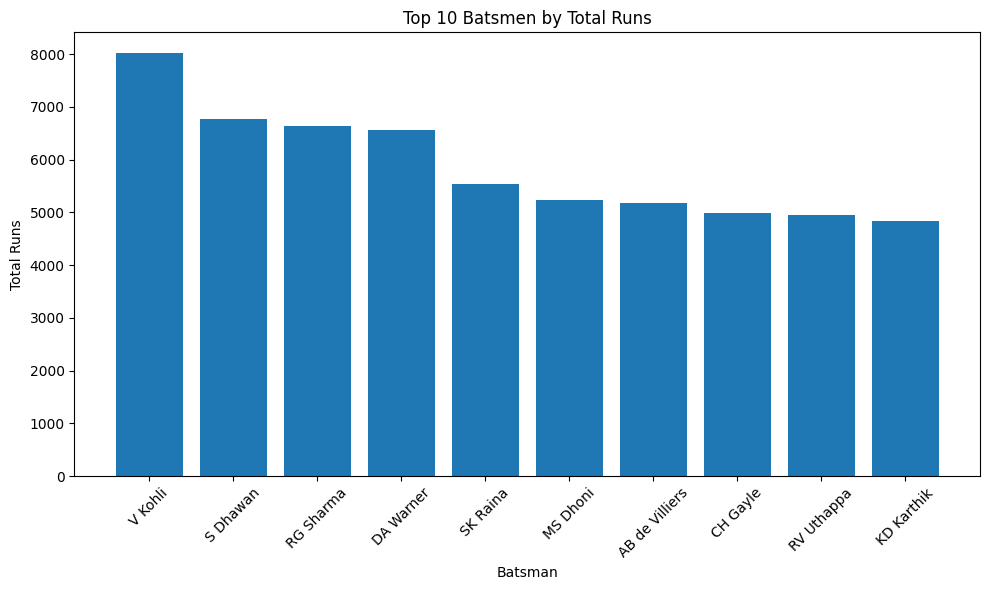

In [60]:
plt.figure(figsize=(10, 6))
plt.bar(top_batsman.index, top_batsman.values)
plt.xlabel('Batsman')
plt.ylabel('Total Runs')
plt.title('Top 10 Batsmen by Total Runs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

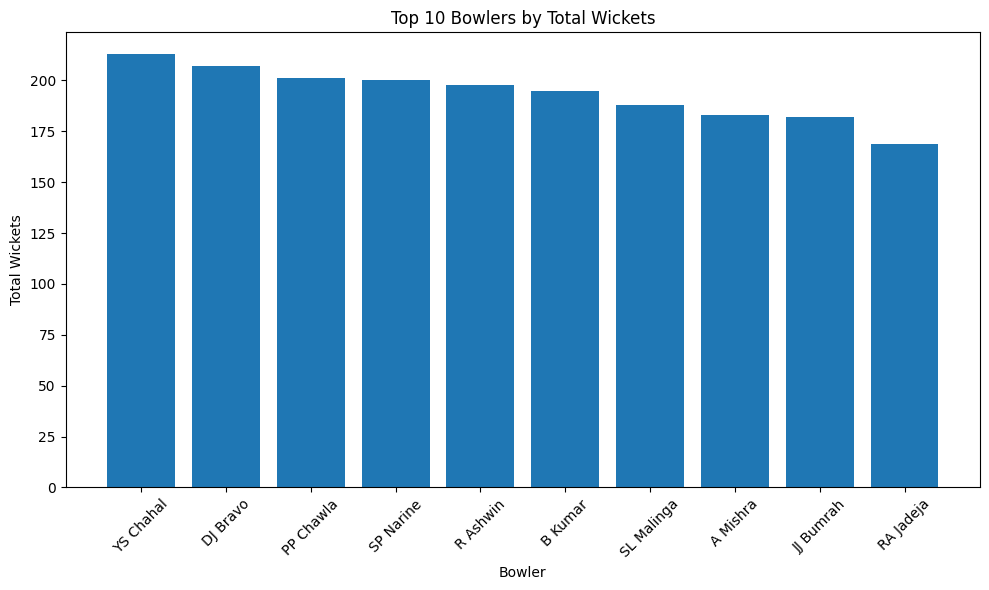

In [61]:
plt.figure(figsize=(10, 6))
plt.bar(top_bowlers.index, top_bowlers.values)
plt.xlabel('Bowler')
plt.ylabel('Total Wickets')
plt.title('Top 10 Bowlers by Total Wickets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

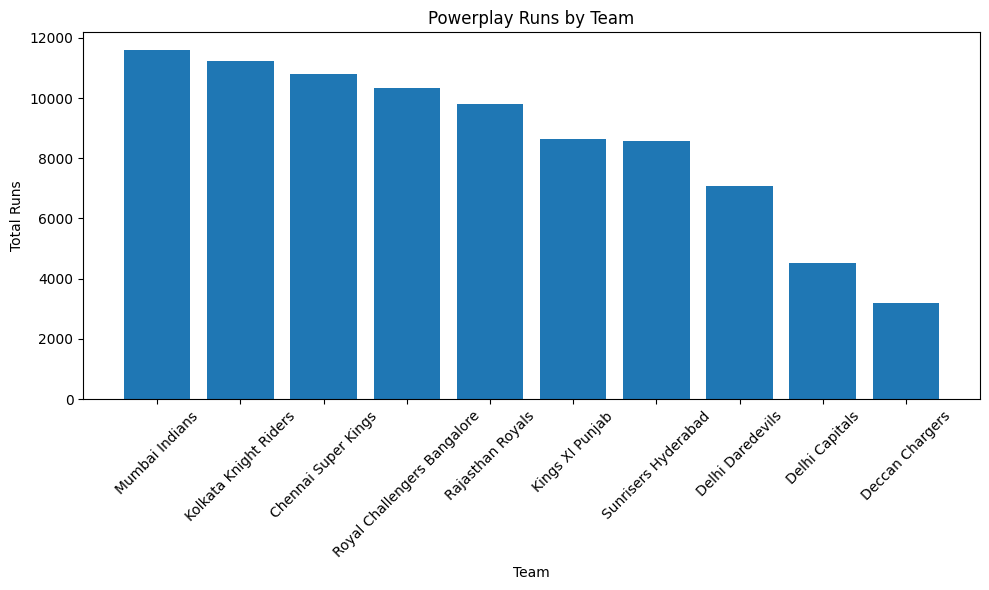

In [62]:
plt.figure(figsize=(10, 6))
plt.bar(powerplay_runs.index, powerplay_runs.values)
plt.xlabel('Team')
plt.ylabel('Total Runs')
plt.title('Powerplay Runs by Team')
plt.xticks(rotation=45)  # rotate names
plt.tight_layout()
plt.show()

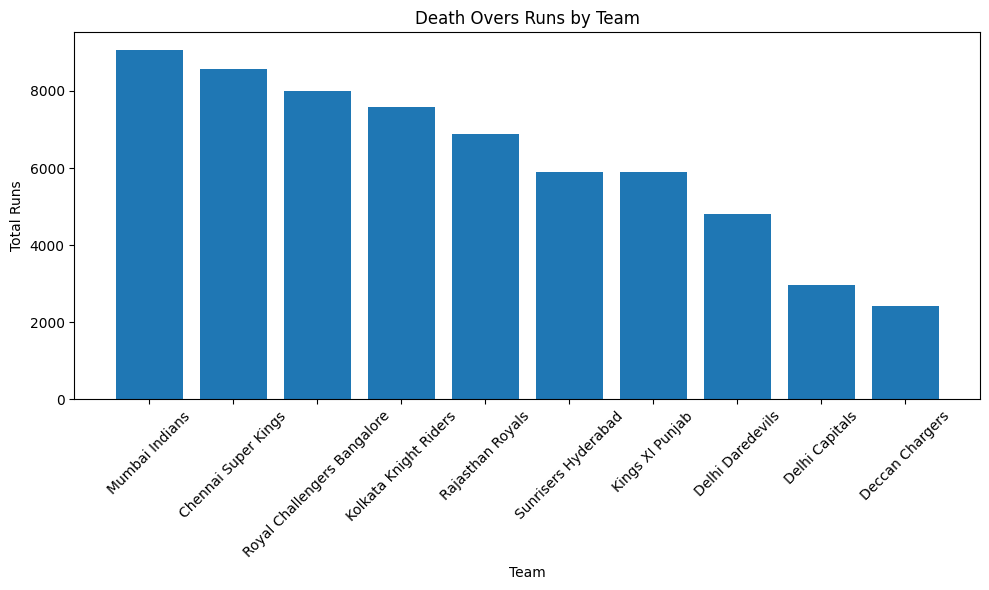

In [63]:
plt.figure(figsize=(10, 6))
plt.bar(death_overs.index, death_overs.values)
plt.xlabel('Team')
plt.ylabel('Total Runs')
plt.title('Death Overs Runs by Team')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()